# 第00章: クイックスタート - MLPによる分類入門

## 🎯 この章で学ぶこと

このノートブックでは、機械学習の基本的なワークフローを実践的に学びます：

- **データ生成**: 合成データセットの作成
- **前処理**: データのスケーリング
- **モデル訓練**: MLPによる分類
- **評価**: モデルの性能測定
- **最適化**: ハイパーパラメータチューニング

⏱️ **推定学習時間**: 30分  
📊 **難易度**: ★☆☆☆☆（入門）

---

## 1. 環境のセットアップ

まず、必要なライブラリをインポートします。

In [33]:
# データ処理と可視化
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# scikit-learn: 機械学習ライブラリ
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# 再現性のための乱数シード設定
np.random.seed(42)

# グラフのスタイル設定
plt.style.use('seaborn-v0_8-whitegrid')

print("✅ ライブラリのインポート完了")

✅ ライブラリのインポート完了


## 2. データの生成と可視化

`make_moons`を使って、非線形に分離可能な二値分類データを生成します。このデータセットは、線形モデルでは分類が難しく、ニューラルネットワークの能力を示すのに適しています。

/Users/ikmx/source/personal/machine-learning-playground/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) Arial.
/Users/ikmx/source/personal/machine-learning-playground/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24500 (\N{CJK UNIFIED IDEOGRAPH-5FB4}) missing from font(s) Arial.
/Users/ikmx/source/personal/machine-learning-playground/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) Arial.
/Users/ikmx/source/personal/machine-learning-playground/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) Arial.
/Users/ikmx/source/personal/machine-learning-playground/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-

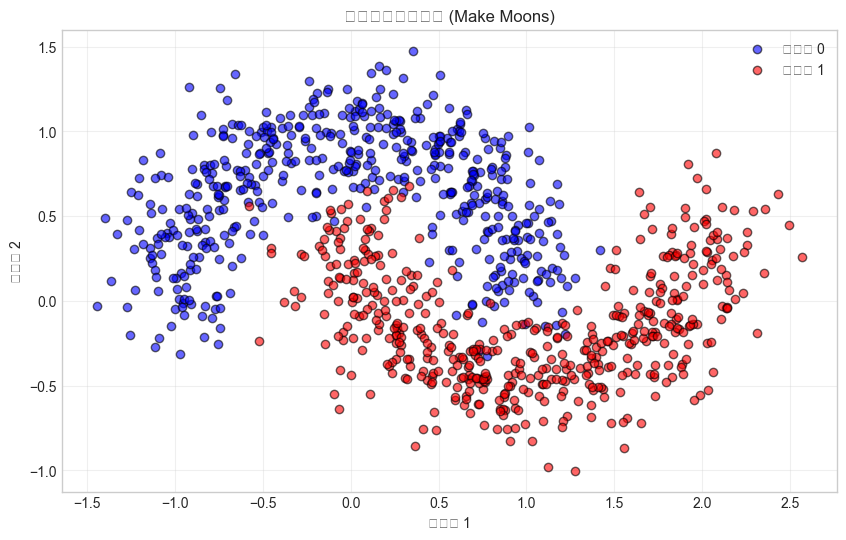

データ形状: (1000, 2)
クラス分布: クラス0=500, クラス1=500


In [34]:
# 月型データセットの生成
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# データの可視化
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='クラス 0', alpha=0.6, edgecolors='k')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='クラス 1', alpha=0.6, edgecolors='k')
plt.xlabel('特徴量 1')
plt.ylabel('特徴量 2')
plt.title('月型データセット (Make Moons)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"データ形状: {X.shape}")
print(f"クラス分布: クラス0={np.sum(y==0)}, クラス1={np.sum(y==1)}")

## 3. データの前処理

### 3.1 データ分割

データを訓練セット（80%）とテストセット（20%）に分割します。

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"訓練セット: {X_train.shape[0]} サンプル")
print(f"テストセット: {X_test.shape[0]} サンプル")

訓練セット: 800 サンプル
テストセット: 200 サンプル


### 3.2 特徴量のスケーリング

ニューラルネットワークは入力データのスケールに敏感です。`StandardScaler`を使って、平均0、標準偏差1に正規化します。

⚠️ **重要**: テストセットには訓練セットの統計量を使います（`transform`のみ）。

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # 訓練セットで統計量を計算
X_test_scaled = scaler.transform(X_test)        # テストセットに適用

print("✅ スケーリング完了")
print(f"訓練セット平均: {X_train_scaled.mean(axis=0)}")
print(f"訓練セット標準偏差: {X_train_scaled.std(axis=0)}")

✅ スケーリング完了
訓練セット平均: [-6.60305144e-16  3.60336760e-16]
訓練セット標準偏差: [1. 1.]


## 4. MLPモデルの訓練

### 4.1 シンプルなMLPモデル

まず、基本的なMLP（多層パーセプトロン）を訓練します。

**主なパラメータ**:
- `hidden_layer_sizes=(50,)`: 隠れ層1層、50ニューロン
- `activation='relu'`: ReLU活性化関数
- `solver='adam'`: Adam最適化アルゴリズム
- `max_iter=500`: 最大反復回数

In [37]:
# MLPモデルの作成と訓練
mlp = MLPClassifier(
    hidden_layer_sizes=(50,),
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

# 評価
train_score = mlp.score(X_train_scaled, y_train)
test_score = mlp.score(X_test_scaled, y_test)

print("\n📊 モデル評価")
print(f"訓練精度: {train_score:.4f}")
print(f"テスト精度: {test_score:.4f}")
print(f"反復回数: {mlp.n_iter_}")


📊 モデル評価
訓練精度: 0.9700
テスト精度: 0.9800
反復回数: 500


/Users/ikmx/source/personal/machine-learning-playground/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### 4.2 詳細な評価レポート

In [38]:
# 予測
y_pred = mlp.predict(X_test_scaled)

# 分類レポート
print("\n📋 分類レポート")
print(classification_report(y_test, y_pred, target_names=['クラス 0', 'クラス 1']))


📋 分類レポート
              precision    recall  f1-score   support

       クラス 0       0.98      0.98      0.98       100
       クラス 1       0.98      0.98      0.98       100

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



## 5. 決定境界の可視化

モデルがどのようにデータを分類しているかを視覚的に確認します。

/Users/ikmx/source/personal/machine-learning-playground/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) Arial.
/Users/ikmx/source/personal/machine-learning-playground/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24500 (\N{CJK UNIFIED IDEOGRAPH-5FB4}) missing from font(s) Arial.
/Users/ikmx/source/personal/machine-learning-playground/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) Arial.
/Users/ikmx/source/personal/machine-learning-playground/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27770 (\N{CJK UNIFIED IDEOGRAPH-6C7A}) missing from font(s) Arial.
/Users/ikmx/source/personal/machine-learning-playground/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23450 (\N{CJK UNIFIED IDEOGRAPH-

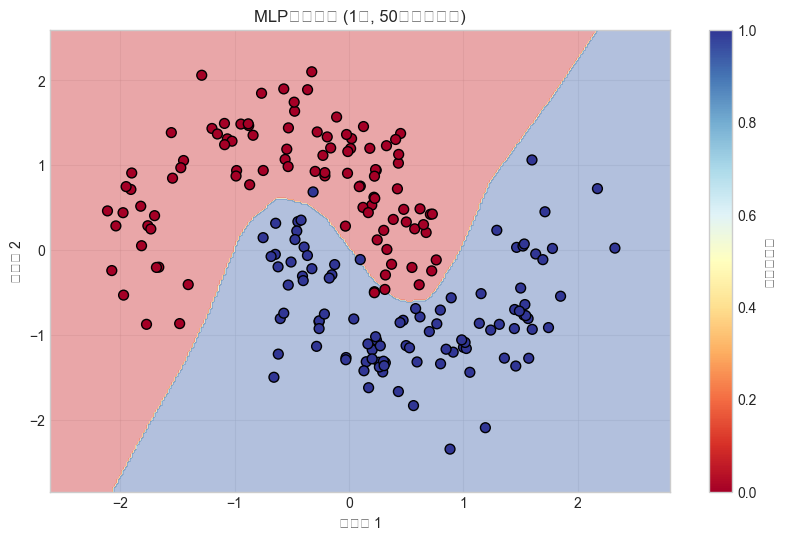

In [39]:
def plot_decision_boundary(model, X, y, title="決定境界"):
    """決定境界をプロットする関数"""
    h = 0.02  # メッシュのステップサイズ
    
    # メッシュグリッドの作成
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # 予測
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # プロット
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black', s=50)
    plt.xlabel('特徴量 1')
    plt.ylabel('特徴量 2')
    plt.title(title)
    plt.colorbar(label='予測クラス')
    plt.grid(True, alpha=0.3)
    plt.show()

# スケーリング後のデータで決定境界をプロット
plot_decision_boundary(mlp, X_test_scaled, y_test, "MLP決定境界 (1層, 50ニューロン)")

## 6. ハイパーパラメータチューニング

`GridSearchCV`を使って、最適なハイパーパラメータを探索します。

In [40]:
# パラメータグリッドの定義
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (50, 25)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}

# グリッドサーチの実行
mlp_gs = MLPClassifier(
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    early_stopping=True
)

grid_search = GridSearchCV(
    mlp_gs,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=1,  # シリアル実行 (並列化を無効化)
    verbose=1
)

print("🔍 グリッドサーチ開始...")
grid_search.fit(X_train_scaled, y_train)

# 結果の表示
print("\n✅ グリッドサーチ完了")
print("\n🏆 最適パラメータ:")
for param, value in grid_search.best_params_.items():
    print(f"  - {param}: {value}")

print(f"\n📊 交差検証スコア: {grid_search.best_score_:.4f}")
print(f"📊 テストスコア: {grid_search.score(X_test_scaled, y_test):.4f}")

🔍 グリッドサーチ開始...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

✅ グリッドサーチ完了

🏆 最適パラメータ:
  - alpha: 0.0001
  - hidden_layer_sizes: (50, 25)
  - learning_rate_init: 0.01

📊 交差検証スコア: 0.9563
📊 テストスコア: 0.9750


### 6.1 グリッドサーチ結果の詳細分析

In [41]:
# 結果をDataFrameに変換
results_df = pd.DataFrame(grid_search.cv_results_)

# 主要な列を抽出
results_summary = results_df[[
    'param_hidden_layer_sizes',
    'param_alpha',
    'param_learning_rate_init',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
]].sort_values('rank_test_score')

print("\n📋 トップ5のパラメータ組み合わせ:")
print(results_summary.head(5).to_string())


📋 トップ5のパラメータ組み合わせ:
   param_hidden_layer_sizes  param_alpha  param_learning_rate_init  mean_test_score  std_test_score  rank_test_score
23                 (50, 25)       0.0100                      0.01          0.95625        0.018957                1
15                 (50, 25)       0.0010                      0.01          0.95625        0.018957                1
7                  (50, 25)       0.0001                      0.01          0.95625        0.018957                1
21                   (100,)       0.0100                      0.01          0.89500        0.044616                4
13                   (100,)       0.0010                      0.01          0.89500        0.044616                4


### 6.2 最適モデルの決定境界

/Users/ikmx/source/personal/machine-learning-playground/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) Arial.
/Users/ikmx/source/personal/machine-learning-playground/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24500 (\N{CJK UNIFIED IDEOGRAPH-5FB4}) missing from font(s) Arial.
/Users/ikmx/source/personal/machine-learning-playground/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) Arial.
/Users/ikmx/source/personal/machine-learning-playground/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from font(s) Arial.
/Users/ikmx/source/personal/machine-learning-playground/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36969 (\N{CJK UNIFIED IDEOGRAPH-

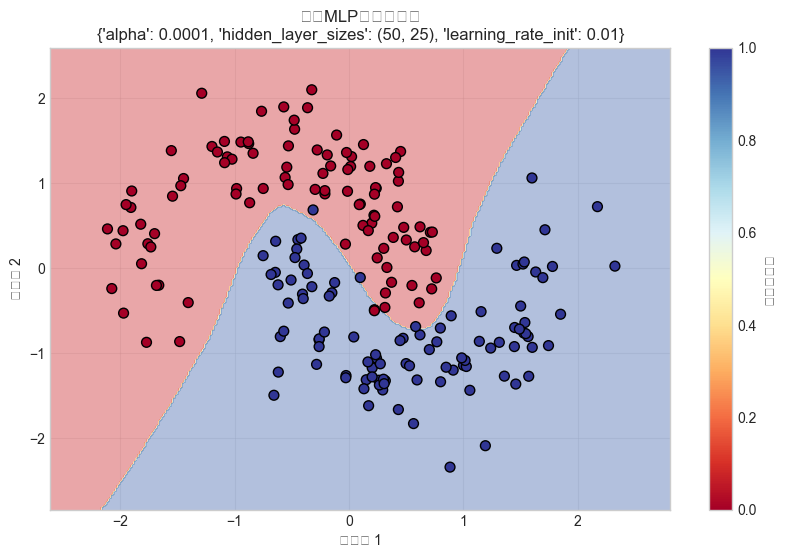

In [42]:
# 最適モデルの決定境界を可視化
best_model = grid_search.best_estimator_
plot_decision_boundary(
    best_model,
    X_test_scaled,
    y_test,
    f"最適MLPの決定境界\n{grid_search.best_params_}"
)

## 7. 学習曲線の分析

学習の過程で損失がどのように変化したかを確認します。

/Users/ikmx/source/personal/machine-learning-playground/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25613 (\N{CJK UNIFIED IDEOGRAPH-640D}) missing from font(s) Arial.
/Users/ikmx/source/personal/machine-learning-playground/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from font(s) Arial.
/Users/ikmx/source/personal/machine-learning-playground/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from font(s) Arial.
/Users/ikmx/source/personal/machine-learning-playground/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32722 (\N{CJK UNIFIED IDEOGRAPH-7FD2}) missing from font(s) Arial.
/Users/ikmx/source/personal/machine-learning-playground/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-

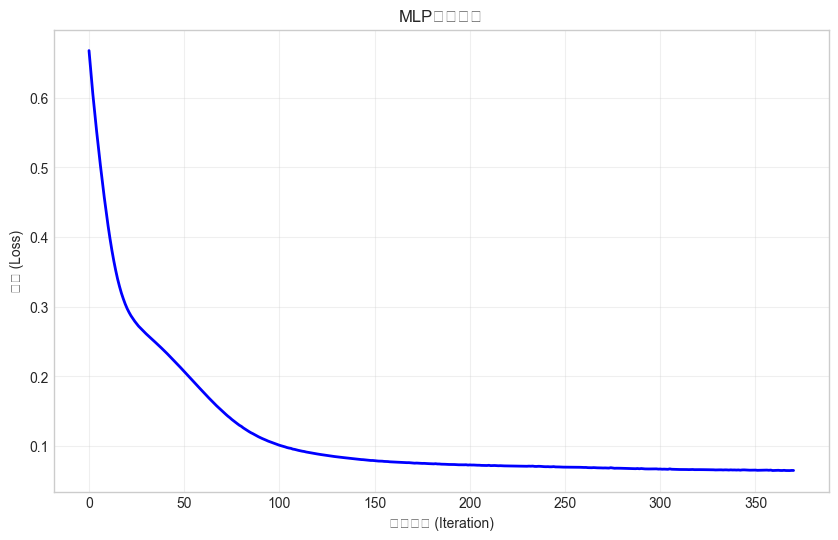

最終損失: 0.065149
テスト精度: 0.9900


In [43]:
# 損失曲線を持つモデルを訓練
mlp_curve = MLPClassifier(
    hidden_layer_sizes=(50, 25),
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42
)

mlp_curve.fit(X_train_scaled, y_train)

# 損失曲線のプロット
plt.figure(figsize=(10, 6))
plt.plot(mlp_curve.loss_curve_, linewidth=2, color='blue')
plt.xlabel('反復回数 (Iteration)')
plt.ylabel('損失 (Loss)')
plt.title('MLP学習曲線')
plt.grid(True, alpha=0.3)
plt.show()

print(f"最終損失: {mlp_curve.loss_curve_[-1]:.6f}")
print(f"テスト精度: {mlp_curve.score(X_test_scaled, y_test):.4f}")

## 8. 異なるアーキテクチャの比較

複数のネットワーク構造を比較して、どのように決定境界が変わるかを確認します。

/Users/ikmx/source/personal/machine-learning-playground/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ikmx/source/personal/machine-learning-playground/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ikmx/source/personal/machine-learning-playground/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/var/folders/6s/q776k1nj6rn9vjn979kn090w0000gn/T/ipykernel_21965/1863882427.py:44: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) Aria

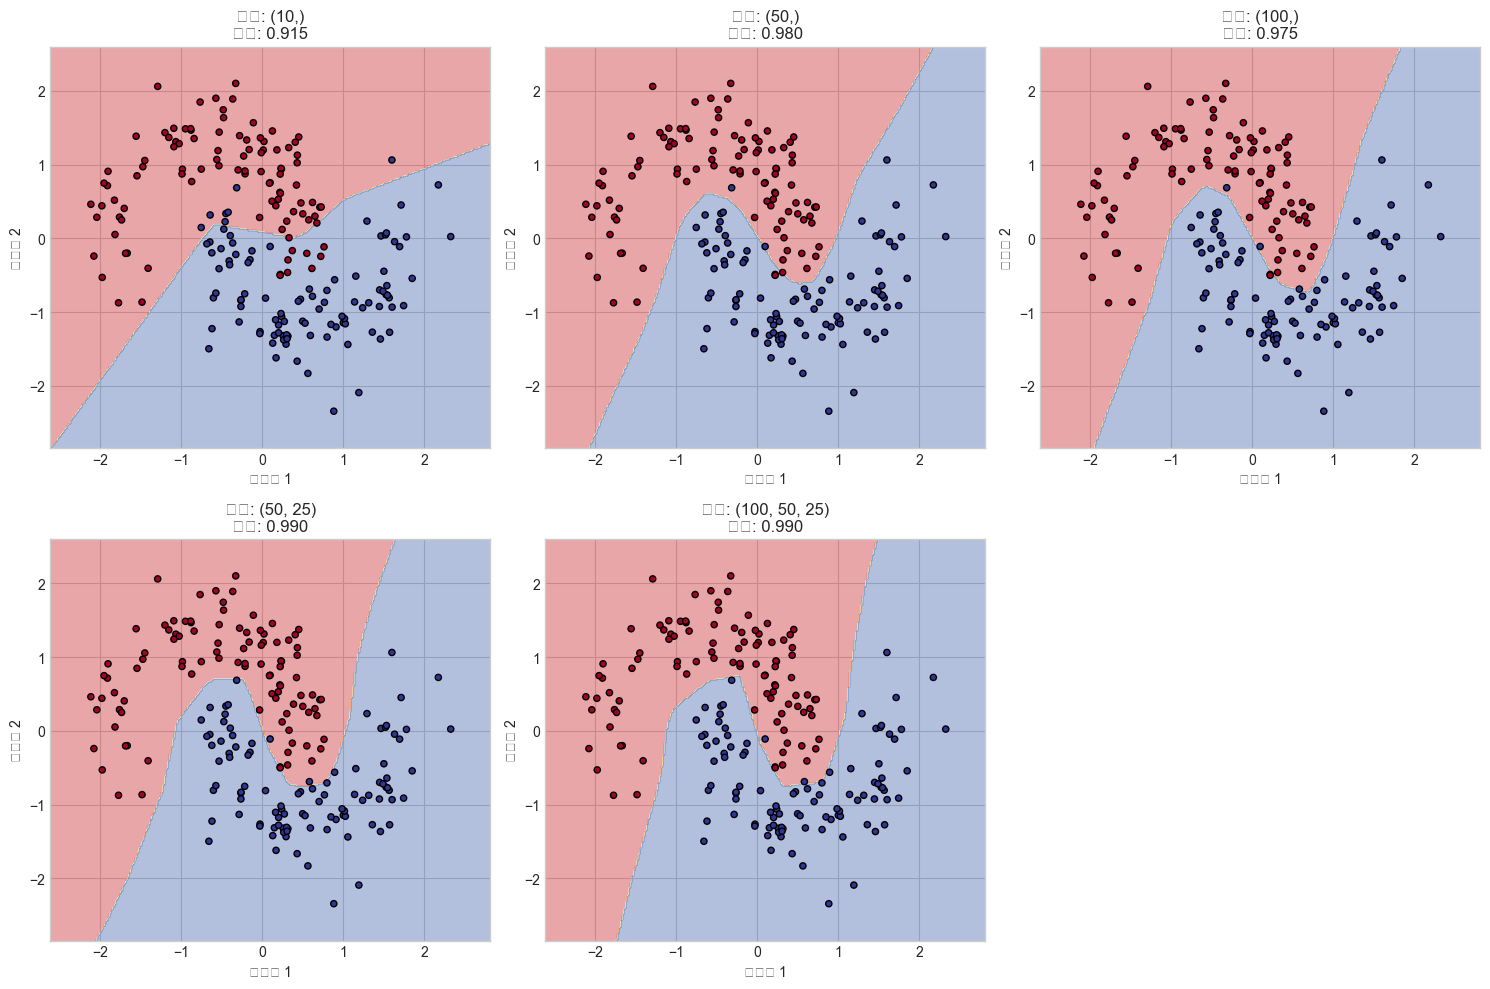

In [44]:
# テストする構造
architectures = [
    (10,),
    (50,),
    (100,),
    (50, 25),
    (100, 50, 25)
]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, arch in enumerate(architectures):
    # モデルの訓練
    model = MLPClassifier(
        hidden_layer_sizes=arch,
        activation='relu',
        solver='adam',
        alpha=0.001,
        max_iter=500,
        random_state=42
    )
    model.fit(X_train_scaled, y_train)
    
    # 決定境界のプロット
    h = 0.02
    x_min, x_max = X_test_scaled[:, 0].min() - 0.5, X_test_scaled[:, 0].max() + 0.5
    y_min, y_max = X_test_scaled[:, 1].min() - 0.5, X_test_scaled[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axes[idx].contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    axes[idx].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test,
                      cmap=plt.cm.RdYlBu, edgecolors='black', s=20)
    axes[idx].set_title(f'構造: {arch}\n精度: {model.score(X_test_scaled, y_test):.3f}')
    axes[idx].set_xlabel('特徴量 1')
    axes[idx].set_ylabel('特徴量 2')

# 空のサブプロットを非表示
axes[-1].axis('off')

plt.tight_layout()
plt.show()

## 9. まとめ

### ✅ 学んだこと

1. **データ生成**: `make_moons`で非線形分類データを生成
2. **前処理**: `StandardScaler`による特徴量スケーリング
3. **モデル訓練**: `MLPClassifier`で多層パーセプトロンを訓練
4. **評価**: 精度スコアと分類レポートで性能を測定
5. **最適化**: `GridSearchCV`でハイパーパラメータを探索
6. **可視化**: 決定境界と学習曲線で理解を深化

### 🎯 重要なポイント

- **スケーリングは必須**: ニューラルネットワークは入力スケールに敏感
- **訓練/テスト分割**: テストセットは訓練に使わない
- **ハイパーパラメータ**: 適切な調整で性能が大きく変わる
- **可視化**: グラフで直感的に理解できる

### 📚 次のステップ

- **Notebook 01**: データシミュレーションの詳細
- **Notebook 02**: より高度な前処理技術
- **Notebook 03**: 深層学習の基礎

### 🔬 発展課題

1. 異なるデータセット（`make_circles`, `make_classification`）で試す
2. 活性化関数を変えてみる（`tanh`, `logistic`）
3. より深いネットワーク構造を試す
4. 正則化パラメータ`alpha`の影響を調べる

---

## 🎉 お疲れ様でした！

機械学習の基本的なワークフローを体験できました。次のノートブックでさらに深く学んでいきましょう！